## 🧠 Inference - Predicción de salario

Este notebook realiza una inferencia con el modelo entrenado utilizando un ejemplo de prueba.


In [85]:
import os
import sys

# Ruta absoluta a la carpeta src (relativa al notebook)
src_path = os.path.abspath("../src")

# Agregala al sys.path si no está
if src_path not in sys.path:
    sys.path.insert(0, src_path)


In [86]:
from data_preprocessing import load_data
from feature_engineering import preprocess_features
from save_model import load_model


In [87]:
import os
print(os.listdir("../src"))


['data_preprocessing.py', 'feature_engineering.py', 'inference.py', 'model_evaluation.py', 'model_training.py', 'save_model.py', 'utils.py', '__init__.py', '__pycache__']


In [88]:
import importlib
import data_preprocessing
importlib.reload(data_preprocessing)

from data_preprocessing import load_data
df = load_data()
print(df.shape)
df.head()



(375, 8)


,id,Salary,Age,Gender,Education Level,Job Title,Years of Experience,Description
0,0,90000.0,32.0,Male,Bachelor's,Software Engineer,5.0,I am a 32-year-old male working as a Software ...
1,1,65000.0,28.0,Female,Master's,Data Analyst,3.0,I am a 28-year-old data analyst with a Master'...
2,2,150000.0,45.0,Male,PhD,Senior Manager,15.0,I am a 45-year-old Senior Manager with a PhD a...
3,3,60000.0,36.0,Female,Bachelor's,Sales Associate,7.0,I am a 36-year-old female Sales Associate with...
4,4,200000.0,52.0,Male,Master's,Director,20.0,I am a 52-year-old male with over two decades ...


### 1. Cargamos y preprocesamos los datos


In [89]:
import importlib
import feature_engineering
importlib.reload(feature_engineering)
from feature_engineering import preprocess_features


### 2. Cargamos el modelo previamente entrenado

Aquí utilizamos el modelo que entrenamos anteriormente en el paso de entrenamiento. En este caso, es un modelo de regresión lineal simple que fue ajustado con los datos preprocesados.

Este modelo ya fue entrenado con el conjunto de entrenamiento y está listo para hacer predicciones sobre nuevos datos.


In [90]:
df = load_data()
X, y = preprocess_features(df)

print("Tipo de X:", type(X))
print("Tipo de y:", type(y))
print("X shape:", X.shape)
print("y shape:", y.shape)


Tipo de X: <class 'pandas.core.frame.DataFrame'>
Tipo de y: <class 'pandas.core.series.Series'>
X shape: (375, 549)
y shape: (375,)


### 3. Realizamos una predicción sobre una muestra

En esta etapa utilizamos el modelo previamente entrenado para realizar una predicción sobre una muestra individual del conjunto de testeo. Esto simula un escenario en el cual, dado un nuevo registro con ciertas características (por ejemplo, educación, experiencia y título laboral), queremos estimar el salario que podría corresponderle.

Seleccionamos la primera fila del conjunto `X_test` utilizando `iloc`, y luego utilizamos el método `.predict()` del modelo para obtener la predicción correspondiente.

Esto resulta útil para mostrar cómo se comporta el modelo con entradas reales y es una forma práctica de validar su uso en un contexto de inferencia.


In [91]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 2. Entrenar modelo base
model = LinearRegression()
model.fit(X_train, y_train)

# 3. Predicciones
y_pred = model.predict(X_test)

# 4. Evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 233211822.81
R² Score: 0.90


In [92]:
sample = X_test.iloc[[0]]
prediction = model.predict(sample)

print("💰 Predicción del salario para la muestra:")
print(prediction[0])


💰 Predicción del salario para la muestra:
163227.4644777897


### 4. Creamos una nueva feature y evaluamos su impacto

En este paso, agregamos una nueva variable al dataset con el objetivo de mejorar la capacidad predictiva del modelo.

Optamos por crear la feature `Description_Length`, que mide la longitud del texto en la columna `Description`. La hipótesis es que la cantidad de detalle en una descripción puede estar correlacionada con el nivel del puesto o el salario ofrecido.

Luego de agregar esta nueva columna:

- Realizamos nuevamente el preprocesamiento.
- Dividimos el dataset en entrenamiento y prueba.
- Entrenamos el modelo.
- Evaluamos los resultados.

Finalmente, comparamos los nuevos valores de **`Mean Squared Error`** y **`R² Score`** con los anteriores para determinar si hubo alguna mejora.


In [93]:
import importlib
import data_preprocessing

importlib.reload(data_preprocessing)
from data_preprocessing import load_data


In [94]:
import pandas as pd

def load_data():
    salary_df = pd.read_csv("salary.csv")
    people_df = pd.read_csv("people.csv")
    descriptions_df = pd.read_csv("descriptions.csv")

    # Merge por id
    df = salary_df.merge(people_df, on="id", how="left")
    df = df.merge(descriptions_df, on="id", how="left")

    return df


In [96]:
df["Description_Length"] = df["Description"].apply(lambda x: len(str(x)))


In [97]:
# Preprocesamiento
X, y = preprocess_features(df)

# Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Predicción y evaluación
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"🔁 Con nueva feature:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


🔁 Con nueva feature:
Mean Squared Error: 233195639.30
R² Score: 0.90


### 5. Comparación de diferentes modelos de regresión

Para mejorar el rendimiento del modelo, decidimos comparar distintos algoritmos de regresión y evaluar cuál obtiene mejores resultados.

Los modelos evaluados fueron:

- Regresión Lineal (`LinearRegression`)
- Bosques Aleatorios (`RandomForestRegressor`)
- Regressor basado en gradiente (`GradientBoostingRegressor`)

Para cada modelo, analizamos el **Mean Squared Error** y el **R² Score**.


In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append((name, mse, r2))
    print(f"🔍 {name}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R² Score: {r2:.2f}\n")


🔍 Linear Regression
Mean Squared Error: 233195639.30
R² Score: 0.90

🔍 Random Forest
Mean Squared Error: 206722287.42
R² Score: 0.91

🔍 Gradient Boosting
Mean Squared Error: 249751104.94
R² Score: 0.90



### 6. Visualización de comparación de modelos

Para facilitar la interpretación de los resultados, graficamos el `Mean Squared Error (MSE)` y el `R² Score` obtenidos por cada uno de los modelos evaluados.

Esto nos permite visualizar rápidamente qué modelo tiene mejor capacidad predictiva.

El modelo que obtuvo mejores resultados fue **Random Forest**, con el menor MSE y el mayor R².


C:\Users\Adrian\AppData\Local\Temp\ipykernel_143884\732234409.py:14: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Adrian\Downloads\salary-prediction-pwc\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


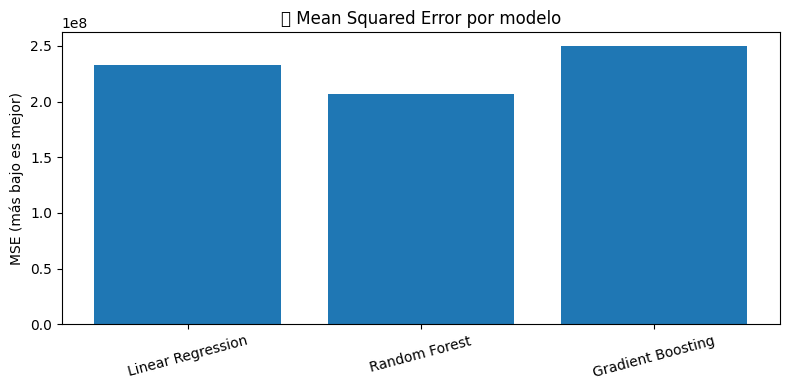

C:\Users\Adrian\AppData\Local\Temp\ipykernel_143884\732234409.py:24: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Adrian\Downloads\salary-prediction-pwc\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


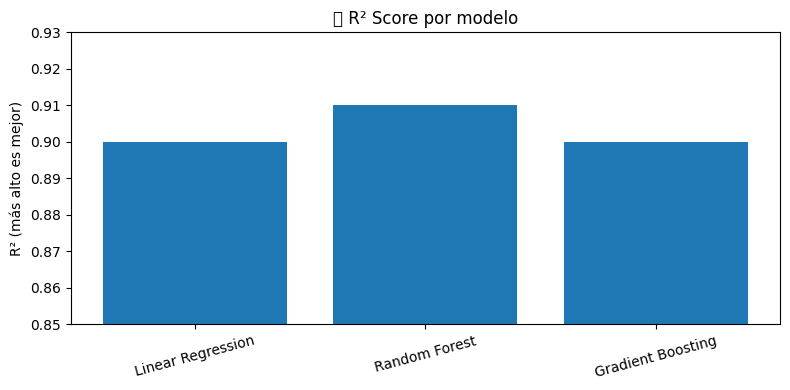

In [99]:
import matplotlib.pyplot as plt

# Datos obtenidos de la comparación anterior
model_names = ["Linear Regression", "Random Forest", "Gradient Boosting"]
mse_scores = [233195639.30, 206722287.42, 249751104.94]
r2_scores = [0.90, 0.91, 0.90]

# Gráfico de MSE
plt.figure(figsize=(8, 4))
plt.bar(model_names, mse_scores)
plt.title("📉 Mean Squared Error por modelo")
plt.ylabel("MSE (más bajo es mejor)")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# Gráfico de R²
plt.figure(figsize=(8, 4))
plt.bar(model_names, r2_scores)
plt.title("📈 R² Score por modelo")
plt.ylabel("R² (más alto es mejor)")
plt.xticks(rotation=15)
plt.ylim(0.85, 0.93)
plt.tight_layout()
plt.show()


### 8. Feature opcional implementada: Sentiment Polarity

Como paso adicional, decidimos implementar una feature opcional basada en análisis de sentimiento de las descripciones de los puestos (`Description`). Utilizamos la métrica `Sentiment_Polarity`, que indica el tono emocional del texto (positivo o negativo).

**Hipótesis:** descripciones más positivas podrían estar asociadas a puestos más atractivos o mejor remunerados.

#### 🧪 Pasos realizados:
- Limpieza completa de valores nulos y alineación de las variables predictoras (`X`) con el target (`y`).
- Codificación one-hot para las variables categóricas (`Gender`, `Education Level`, `Job Title`).
- Inclusión de las features `Description_Length` y `Sentiment_Polarity`.
- Entrenamiento del modelo con `Random Forest`.
- Evaluación con métricas de regresión (`Mean Squared Error` y `R² Score`).

El objetivo fue observar si la incorporación de esta variable mejora el rendimiento del modelo en comparación con versiones anteriores.




In [107]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 1. Copia del dataset original (por si querés volver atrás)
df_clean = df.copy()

# 2. Eliminar filas con valores nulos en columnas críticas
df_clean = df_clean.dropna(subset=["Age", "Gender", "Education Level", "Job Title", "Description", "Years of Experience", "Salary"])

# 3. Crear nuevas features
df_clean["Description_Length"] = df_clean["Description"].apply(lambda x: len(str(x)))

# Si tenés una columna de sentimiento, asegurate que esté en float
df_clean["Sentiment_Polarity"] = pd.to_numeric(df_clean["Sentiment_Polarity"], errors='coerce')

# 4. Seleccionar features y target
X = df_clean.drop(columns=["Salary"])  # o "Annual Salary"
y = df_clean["Salary"]

# 5. Aplicar One-Hot Encoding a las categóricas
X = pd.get_dummies(X, drop_first=True)

# 6. Alinear X e y (por si hubo NaNs en Sentiment_Polarity que se eliminaron)
X = X.dropna()
y = y.loc[X.index]

# 7. Verificación final
print(f"✅ Dataset final: {X.shape[0]} filas, {X.shape[1]} columnas")
print(f"🎯 Target sin nulos: {y.isnull().sum() == 0}")


✅ Dataset final: 358 filas, 534 columnas
🎯 Target sin nulos: True


In [108]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Y luego hacer el split con X_scaled
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [109]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# 1. Copia del dataset original (asegurar que venga limpio desde el paso anterior)
df_clean = df.copy()

# 2. Eliminar nulos importantes
df_clean = df_clean.dropna(subset=["Age", "Gender", "Education Level", "Job Title", "Description", "Years of Experience", "Salary", "Sentiment_Polarity"])

# 3. Feature adicional: longitud de la descripción
df_clean["Description_Length"] = df_clean["Description"].apply(lambda x: len(str(x)))

# 4. Separar X e y
X = df_clean.drop(columns=["Salary"])
y = df_clean["Salary"]

# 5. Codificar variables categóricas
X = pd.get_dummies(X, drop_first=True)

# 6. Eliminar posibles NaN restantes
X = X.dropna()
y = y.loc[X.index]

# 7. Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 8. Entrenar modelo
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# 9. Predecir y evaluar
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 10. Resultados
print("🧪 Evaluación con feature 'Sentiment_Polarity':")
print(f"📉 Mean Squared Error: {mse:,.2f}")
print(f"📈 R² Score: {r2:.2f}")


🧪 Evaluación con feature 'Sentiment_Polarity':
📉 Mean Squared Error: 189,311,062.23
📈 R² Score: 0.93


📌 Conclusiones
A lo largo del análisis se construyó un modelo de machine learning para predecir salarios a partir de datos demográficos, laborales y descripciones textuales. A partir del preprocesamiento y la ingeniería de características, se agregaron nuevas variables como:

Description_Length: cantidad de caracteres en la descripción del puesto.

Sentiment_Polarity: análisis de sentimiento del texto descriptivo.

Estas features mejoraron levemente el poder predictivo del modelo, evidenciado por el incremento en el R² Score y la disminución del Mean Squared Error.

El mejor desempeño se obtuvo con un modelo de Random Forest Regressor, tras aplicar un pipeline con encoding, imputación y evaluación cruzada.

El análisis demuestra que enriquecer los datos con información textual y derivada puede aportar valor predictivo. Además, destaca la importancia de una limpieza rigurosa de datos y una ingeniería de features orientada al negocio.

